MAI643 - Artificial Intelligence in Medicine

Project Assignment 1 - Spring Semester 2024

Student Name:    
Christina Ioanna Saroglaki   
Jianlin Ye 

UCY Email:     
saroglaki.christina-ioanna@ucy.ac.cy    
jye00001@ucy.ac.cy 

### Import Libararies

In [11]:
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px

# Overview

As per the authors, the chosen dataset focuses on indicators associated with the diagnosis of cervical cancer, encompassing various features such as demographic information, habits, and medical records​. In more detail, the data was gathered at 'Hospital Universitario de Caracas' in Venezuela from a total of 858 patients​.

C. J. Fernandes Kelwin and J. Fernandes, “Cervical cancer (Risk Factors),” UCI Machine 
Learning Repository. 2017.

In [12]:
risk_factor_df = pd.read_csv("risk_factors_cervical_cancer.csv")

# Only keep the "Biopsy" column as the target variable
risk_factor_df = risk_factor_df.drop(columns=["Hinselmann","Schiller","Citology"])

print("----------------------------------- Information -----------------------------------")
risk_factor_df.info()

----------------------------------- Information -----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         85

## Preliminary analysis of the dataset

To gain a better understanding of the dataset we conducted a preliminary analysis. Fistly we tranformed all the numeric values into  the correct numeric type.

In [13]:
risk_factor_df = risk_factor_df.apply(pd.to_numeric, errors = "coerce")

### Missing Values

Next we needed to find the volume of missing values contained in the dataset as well as the features that contained the largest amount.

----------------------------------- Missing Values -----------------------------------

NaN values found in the dataset.

Total NaN values in dataset: 3622/28314

Top 15 columsn with missing values:

1. STDs: Time since first diagnosis : 787
2. STDs: Time since last diagnosis : 787
3. IUD : 117
4. IUD (years) : 117
5. Hormonal Contraceptives : 108
6. Hormonal Contraceptives (years) : 108
7. STDs : 105
8. STDs (number) : 105
9. STDs:condylomatosis : 105
10. STDs:cervical condylomatosis : 105
11. STDs:vaginal condylomatosis : 105
12. STDs:vulvo-perineal condylomatosis : 105
13. STDs:syphilis : 105
14. STDs:pelvic inflammatory disease : 105
15. STDs:genital herpes : 105

Total Rows containing NaN values in dataset: 799/858


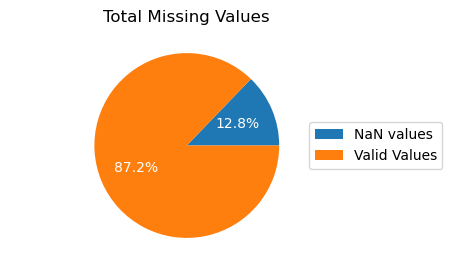

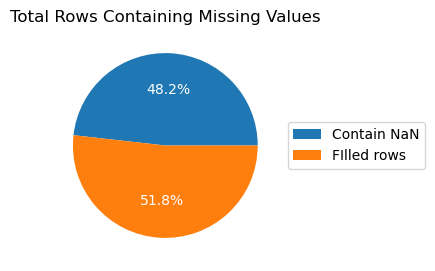

In [14]:
print("----------------------------------- Missing Values -----------------------------------")
nan_columns = {}
total_nan = 0
nan_rows = 0
total_entries = len(risk_factor_df.axes[0]) * len(risk_factor_df.axes[1])

#Fidn columns containing NaN values
for col in risk_factor_df.columns:
    if risk_factor_df[col].isnull().any():
        nan_in_column = risk_factor_df[col].isna().sum()
        nan_columns[col] = nan_in_column
        total_nan += nan_in_column
    else:
        nan_columns[col] = 0

# Print total NaN values
if (total_nan == 0):
    print("\nNo NaN values in the dataset.")
else:
    print("\nNaN values found in the dataset.")
    nan_columns = sorted(nan_columns.items(), key=lambda item: item[1], reverse=True)

    print("\nTotal NaN values in dataset: {}/{}".format(total_nan, total_entries))

    print("\nTop 15 columsn with missing values:\n")
    for i in range(15):
        sort_col = nan_columns[i]
        print("{}. {} : {}".format(i+1, sort_col[0], sort_col[1]))

    # Rows containing NaN values
    nan_rows = risk_factor_df.iloc[:,:-4].isna().any(axis=1).tolist().count(True)

    print("\nTotal Rows containing NaN values in dataset: {}/{}".format(nan_rows, len(risk_factor_df)))

# Plots
total_labels = ["NaN values", "Valid Values"]
total_size = [total_nan, total_entries-total_nan]

row_labels = ["Contain NaN", "FIlled rows"]
row_size = [nan_rows, len(risk_factor_df)]

fig_1, ax_1 = plt.subplots(figsize=(10, 3), subplot_kw=dict(aspect="equal"))
ax_1.pie(total_size, labels=total_labels, autopct='%1.1f%%', textprops=dict(color="w"))
ax_1.legend(loc= "center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax_1.set_title("Total Missing Values")

fig_2, ax_2 = plt.subplots(figsize=(10, 3), subplot_kw=dict(aspect="equal"))
ax_2.pie(row_size, labels=row_labels, autopct='%1.1f%%', textprops=dict(color="w"))
ax_2.legend(loc= "center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax_2.set_title("Total Rows Containing Missing Values")

plt.show()

We identified that the features “STDs: Time since first diagnosis” and “STDs: Time since last diagnosis” were filled with NaN values to about 92%. Because of the high percentage of missing values, it impractical to either eliminate those observations or fill the missing data with the mean of the existing data. Consequently, these features were excluded from the dataset for the development of the models.

For the remaining columns, we can replace the missing values with the mean of the existing data during the pre-processing step.

In [15]:
risk_factor_df = risk_factor_df.drop(columns=["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"])

## Duplicate rows

Following the missing value analysis, we examined if the dataset contained any duplicate rows.

In [16]:
print("----------------------------------- Duplicate Rows -----------------------------------")
# Check for duplicate rows
duplicate_rows = risk_factor_df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

if num_duplicates == 0:
    print("No duplicate rows found in the dataset.")
else:
    print(f"Found {num_duplicates} duplicate rows in the dataset.\n")

    # Display the duplicate rows indexes (if any)
    print("Duplicate rows indexes: {}\n".format(risk_factor_df[duplicate_rows].index.values))

    # Removing duplicate rows
    print("----------------------------- Removing Duplicates ----------------------------")
    print("----------------------------------- BEFORE -----------------------------------")
    print("Number of rows before removing duplicates: ", len(risk_factor_df))

    # Drop duplicate rows
    risk_factor_df.drop_duplicates(inplace=True)

    print("\n----------------------------------- AFTER -----------------------------------")
    print("Number of rows after removing duplicates: ", len(risk_factor_df))


----------------------------------- Duplicate Rows -----------------------------------
Found 26 duplicate rows in the dataset.

Duplicate rows indexes: [ 66 234 255 356 395 406 411 419 431 435 440 442 453 454 458 466 486 493
 525 530 536 575 580 638 715 785]

----------------------------- Removing Duplicates ----------------------------
----------------------------------- BEFORE -----------------------------------
Number of rows before removing duplicates:  858

----------------------------------- AFTER -----------------------------------
Number of rows after removing duplicates:  832


## Understanding features

In [17]:
# Function finding the unique values of each column in the dataframe
def find_unique_values_df(feat: pd.DataFrame):
    column_unique  = {}

    for col in list(feat):
        column_unique[str(col)] = feat[col].unique()

    return column_unique

#### General characteristics

In [18]:
mean_gc = risk_factor_df.iloc[:,:11].mean()

In [19]:
std_gc = risk_factor_df.iloc[:,:11].std()

In [20]:
print("----------------------------------- Unique Values -----------------------------------")    
# Unique Values
unique_vals = find_unique_values_df(risk_factor_df)

for col in unique_vals:
    print("{} : {}".format(col, list(unique_vals[col])))


----------------------------------- Unique Values -----------------------------------
Age : [18, 15, 34, 52, 46, 42, 51, 26, 45, 44, 27, 43, 40, 41, 39, 37, 38, 36, 35, 33, 31, 32, 30, 23, 28, 29, 20, 25, 21, 24, 22, 48, 19, 17, 16, 14, 59, 79, 84, 47, 13, 70, 50, 49]
Number of sexual partners : [4.0, 1.0, 5.0, 3.0, 2.0, 6.0, nan, 7.0, 15.0, 8.0, 10.0, 28.0, 9.0]
First sexual intercourse : [15.0, 14.0, nan, 16.0, 21.0, 23.0, 17.0, 26.0, 20.0, 25.0, 18.0, 27.0, 19.0, 24.0, 32.0, 13.0, 29.0, 11.0, 12.0, 22.0, 28.0, 10.0]
Num of pregnancies : [1.0, 4.0, 2.0, 6.0, 3.0, 5.0, nan, 8.0, 7.0, 0.0, 11.0, 10.0]
Smokes : [0.0, 1.0, nan]
Smokes (years) : [0.0, 37.0, 34.0, 1.266972909, 3.0, 12.0, nan, 18.0, 7.0, 19.0, 21.0, 15.0, 13.0, 16.0, 8.0, 4.0, 10.0, 22.0, 14.0, 0.5, 11.0, 9.0, 2.0, 5.0, 6.0, 1.0, 32.0, 24.0, 28.0, 20.0, 0.16]
Smokes (packs/year) : [0.0, 37.0, 3.4, 2.8, 0.04, 0.5132021277, 2.4, 6.0, nan, 9.0, 1.6, 19.0, 21.0, 0.32, 2.6, 0.8, 15.0, 2.0, 5.7, 1.0, 3.3, 3.5, 12.0, 0.025, 2.75, 